In [2]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image
from PIL import ImageDraw
from PIL import ImageColor
import PIL
import time
from scipy.stats import norm
# from pathlib import Path
%matplotlib inline
plt.style.use('ggplot')

In [3]:
ROOT = "./dataset/"

# Model

In [4]:
import keras
from keras.models import Sequential
from keras.layers import Conv2D, Flatten, Dense, Dropout, Lambda, Reshape, BatchNormalization
from keras.utils import to_categorical

Using TensorFlow backend.


In [10]:
# SIZE = (64, 64)
# class DataGenerator(keras.utils.Sequence):
#     'Generates data for Keras'
#     def __init__(self, paths, batch_size=32, shuffle=True):
        
#         self.paths = paths
#         self.batch_size = batch_size
#         self.shuffle = shuffle
#         self.on_epoch_end()
#         self.mean = np.array([0.36574439, 0.42306867, 0.46404403])
#         self.std = np.array([0.23478078, 0.2944044 , 0.39028775])

#     def __len__(self):
#         'Denotes the number of batches per epoch'
#         return int(np.floor(len(self.paths) / self.batch_size))

#     def __getitem__(self, index):
#         'Generate one batch of data'
#         indexes = self.indexes[index*self.batch_size:(index+1)*self.batch_size]

#         # Find list of IDs
#         idxs = [self.indexes[k] for k in indexes]
        
#         X = np.zeros((self.batch_size, *SIZE, 3), dtype=np.uint8)
#         y = np.zeros((self.batch_size), dtype=np.float32)
        
#         for i, idx in enumerate(idxs):
#             img = Image.open(self.paths[idx])
#             img = img.resize(SIZE)
#             if self.shuffle:
#                 img = img.transpose(np.random.randint(0, 7))
                
#             X[i] += np.asarray(img)
#             target = int(str(self.paths[idx]).split('_')[1].split('.')[0])
#             target = 0 if target == 0 else 1
#             y[i] = target
#         X = X.astype(np.float32) / 255.
#         X -= self.mean 
#         X /= self.std
#         return X, y

#     def on_epoch_end(self):
#         'Updates indexes after each epoch'
#         self.indexes = np.arange(len(self.paths))
#         if self.shuffle == True:
#             np.random.shuffle(self.indexes)

In [5]:
from keras.preprocessing.image import ImageDataGenerator

In [46]:
aug = ImageDataGenerator(
    rescale=1./255,
    rotation_range=20,
    zoom_range=0.2,
    width_shift_range=0.15,
    height_shift_range=0.15,
    shear_range=0.2,
    horizontal_flip=True,
    vertical_flip=True,
    fill_mode="nearest")

In [47]:
it = aug.flow_from_directory(ROOT, (64, 64), batch_size=64, class_mode='binary')

Found 344 images belonging to 2 classes.


In [48]:
batch = next(it)

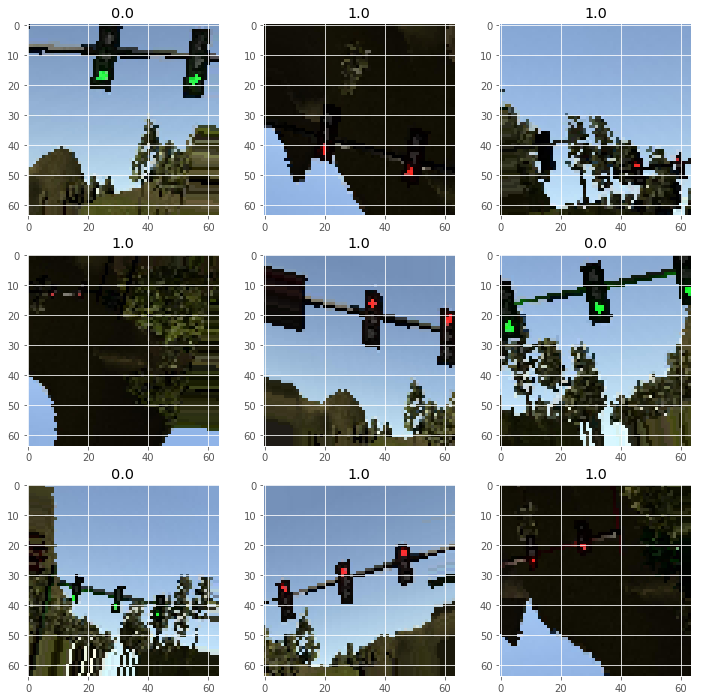

In [49]:
fig, axs = plt.subplots(3, 3, figsize=(12, 12))

for i, ax in enumerate(axs.flat):
    ax.imshow(batch[0][i] )
    ax.set_title(batch[1][i])

In [60]:
model = Sequential()
model.add(Conv2D(4, 5, strides=(2,2), activation='relu', input_shape=(64, 64, 3)))
model.add(Conv2D(4, 5, strides=(2,2), activation='relu'))
model.add(Conv2D(8, 3, strides=(2,2), activation='relu'))
model.add(Flatten())
model.add(Dropout(.1))
model.add(Dense(16, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

model.compile(loss='binary_crossentropy', metrics=['accuracy'], optimizer='rmsprop')


In [61]:
gen = aug.flow_from_directory(ROOT, (64, 64), batch_size=64, class_mode='binary')

Found 344 images belonging to 2 classes.


In [62]:
model.fit_generator(gen, 344//64, epochs=500, use_multiprocessing=True, workers=4)

Epoch 1/500
5/5 [==============================] - 0s - loss: 0.7112 - acc: 0.4781     
Epoch 2/500
5/5 [==============================] - 0s - loss: 0.6913 - acc: 0.5500     
Epoch 3/500
5/5 [==============================] - 0s - loss: 0.6918 - acc: 0.5469     
Epoch 4/500
5/5 [==============================] - 0s - loss: 0.6917 - acc: 0.5312     
Epoch 5/500
5/5 [==============================] - 0s - loss: 0.6703 - acc: 0.6003     
Epoch 6/500
5/5 [==============================] - 0s - loss: 0.6910 - acc: 0.5438     
Epoch 7/500
5/5 [==============================] - 0s - loss: 0.6794 - acc: 0.5719     
Epoch 8/500
5/5 [==============================] - 0s - loss: 0.6912 - acc: 0.5312     
Epoch 9/500
5/5 [==============================] - 0s - loss: 0.6845 - acc: 0.5638     
Epoch 10/500
5/5 [==============================] - 0s - loss: 0.6916 - acc: 0.5561     
Epoch 11/500
5/5 [==============================] - 0s - loss: 0.6836 - acc: 0.5531     
Epoch 12/500
5/5 [============

In [65]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_20 (Conv2D)           (None, 30, 30, 4)         304       
_________________________________________________________________
conv2d_21 (Conv2D)           (None, 13, 13, 4)         404       
_________________________________________________________________
conv2d_22 (Conv2D)           (None, 6, 6, 8)           296       
_________________________________________________________________
flatten_7 (Flatten)          (None, 288)               0         
_________________________________________________________________
dropout_6 (Dropout)          (None, 288)               0         
_________________________________________________________________
dense_11 (Dense)             (None, 16)                4624      
_________________________________________________________________
dense_12 (Dense)             (None, 1)                 17        
Total para

In [13]:
#model.save("tf_classifier.h5")

# TEST

In [8]:
import cv2
from keras.models import load_model
import glob
import numpy as np
import matplotlib.pyplot as plt

In [9]:
model = load_model("tf_classifier.h5")

In [10]:
imgs = np.random.permutation(glob.glob('dataset/green/*') + glob.glob('dataset/red/*'))

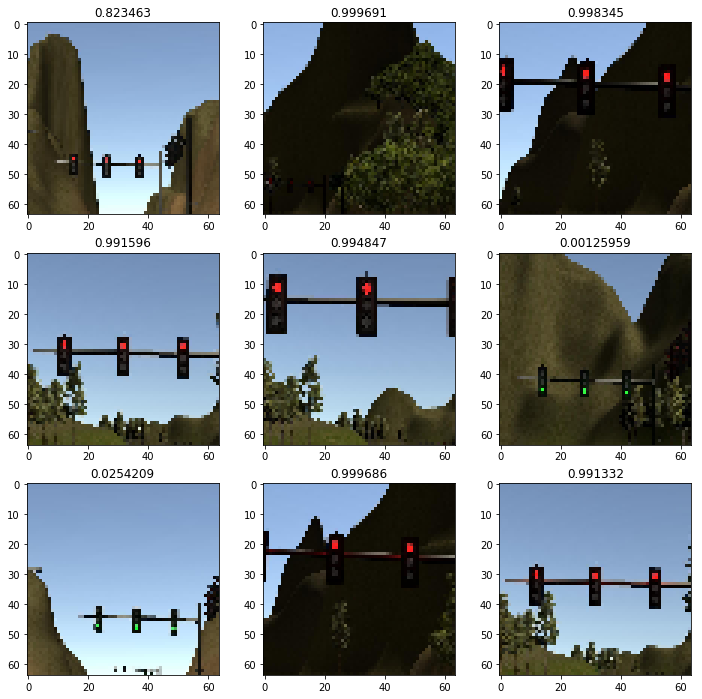

In [11]:
fig, axs = plt.subplots(3, 3, figsize=(12,12))

for i, ax in enumerate(axs.flat):
    img = cv2.imread(imgs[i])
    img = cv2.resize(img, (64, 64))

    img = img[..., ::-1] / 255.
    result = model.predict(img[np.newaxis, ...])
    ax.imshow(img)
    ax.set_title(result[0][0])